# Logistic model 
This model is an application in Python of the model presented in chapter 4.6 of the book : "introduction to statistical learning" (Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani). The model is aimed at predicting whether the day ahead price of electricity will go up or down. 

## 1. Load packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## 2. Prepare data 

In [2]:
#load data
df = pd.read_csv("C:/Users/julie/dataframe_PS_2.csv", index_col='Unnamed: 0')

#compute returns 
df['preturn'] = df['P_DE'].pct_change()

#create a direction variable : 1 if price went up, 0 if price went down 
df['direction'] = 1 * (df['preturn'] >=0) 

#drop nan
df = df.dropna()

#define X and y 
X = df[[
    'temp_DE',
    'Q_DE_lag1',
    'P_DE_lag1',
    'P_DE_lag2',
    'P_DE_lag3',
    'P_DE_lag4',
    'P_DE_lag5',
    'P_DE_lag6',
    'P_DE_lag7',
    'P_DE_lag8',
    'P_DE_lag9',
    'P_DE_lag10',
    'P_DE_lag11',
    'P_DE_lag12',
    'P_DE_lag13',
    'P_DE_lag14',
    'P_DE_lag15',
    'P_DE_lag16',
    'P_DE_lag17',
    'P_DE_lag18',
    'P_DE_lag19',
    'P_DE_lag20',
    'P_DE_lag21',
    'P_DE_lag22',
    'P_DE_lag23',
    'P_DE_lag24',
   ]]

y = df['direction']

#split the dataframe betweenn train and test 
X_train = X.iloc[:round(len(df)*0.75)]
y_train = y.iloc[:round(len(df)*0.75)]
X_test = X.iloc[round(len(df)*0.75)+1:]
y_test = y.iloc[round(len(df)*0.75)+1:]

## 3. Estimation 

In [3]:
logreg = LogisticRegression(fit_intercept=True, max_iter=10000) 
logreg.fit(X_train, y_train)
const = logreg.intercept_
coefs = logreg.coef_
prob = logreg.predict_proba(X_test)
pred = logreg.predict(X_test)
score = logreg.score(X_test, y_test)

## 4. Evaluation

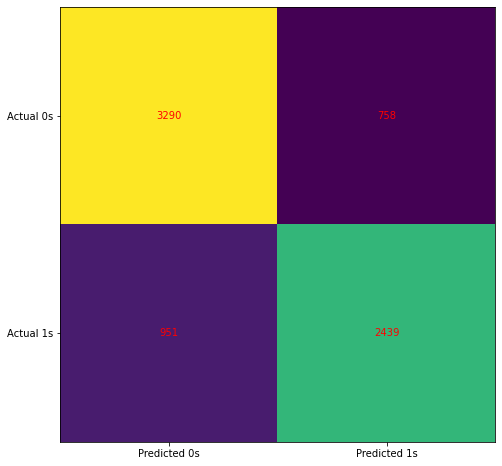

In [4]:
cm = confusion_matrix(y_test, logreg.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
#plt.savefig('confusiionM.png')

In [10]:
correct_ups = 2439 / (2439 + 951)
print("Correct ups prediction :",round(correct_ups,4)*100, "%")
correct_downs = 3290 / (3290 + 758)
print("Correct downs prediction :", round(correct_downs,4)*100, "%")

Correct ups prediction : 71.95 %
Correct downs prediction : 81.27 %
